In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
kill_MIRAMAR=pd.read_csv('C:/Users/sun/Desktop/Univ/4_1/MediaProject/Project2/data_Kill_MIRAMAR.csv')
kill_ERANGEL=pd.read_csv('C:/Users/sun/Desktop/Univ/4_1/MediaProject/Project2/data_Kill_ERANGEL.csv')

In [3]:
bw_MIRAMAR=kill_MIRAMAR[kill_MIRAMAR.kill_by_type=='weapon']
bw_ERANGEL=kill_ERANGEL[kill_ERANGEL.kill_by_type=='weapon']

In [33]:
distance=['10~100','100~1000','1000~10000','10000~100000']
weapon_label=['AKM','Kar98k','M416','S1897','M16A4','SCAR-L','UMP9','SKS','Mini 14']
test_df=pd.DataFrame(columns=test_label, index=distance)

In [41]:
#킬 거리에 따른 무기 사용 횟수 구하기
def count_killed_by(df):
    distance=['10~100','100~1000','1000~10000','10000~100000']
    weapon_label=['AKM','Kar98k','M416','S1897','M16A4','SCAR-L','UMP9','SKS','Mini 14']
    result_df=pd.DataFrame(columns=test_label, index=distance)
    for i in range(len(result_df.columns)):
        for k in range(0,4):
           temp_df1=df[(df.kill_log_distance>=k+1)&(df.kill_log_distance<k+2)]
           result_df.iloc[k,i]=len(temp_df1[temp_df1.killed_by==result_df.columns[i]])
    return result_df

In [42]:
kill_count_MIRAMAR=count_killed_by(bw_MIRAMAR)

In [43]:
kill_count_MIRAMAR

,AKM,Kar98k,M416,S1897,M16A4,SCAR-L,UMP9,SKS,Mini 14
10~100,1992,119,1890,1807,1750,1659,1630,315,320
100~1000,68250,2280,79981,53620,59446,66284,57176,8310,9466
1000~10000,86754,19815,156959,12575,93433,119847,50906,21435,23195
10000~100000,11046,29638,24133,66,14315,18113,1255,20558,15750


In [44]:
kill_count_ERANGEL=count_killed_by(bw_ERANGEL)

In [45]:
kill_count_ERANGEL

,AKM,Kar98k,M416,S1897,M16A4,SCAR-L,UMP9,SKS,Mini 14
10~100,10608,500,9024,12336,9446,8115,9007,1482,1860
100~1000,315684,9063,315861,318095,278739,269542,268696,34093,45260
1000~10000,398027,94313,588608,76358,474477,485607,223529,92594,146689
10000~100000,71255,133547,120664,728,112285,90557,7894,82170,103005


In [46]:
#kill_log_distance별로 죽은 사람들이 어떤 요인으로 죽었는지 확인하는 파이차트
def kill_by_type_test(df):
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    colors=['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','#faebd7','#cbbeb5','#8FD8D0','#CE7B33','#6670AA','#6AC164']

    for i in range(0,5):
        temp_df=df[(df.kill_log_distance>=i)&(df.kill_log_distance<i+1)]
        labels=temp_df['killed_by'].value_counts().head(10).index
        ratio=temp_df['killed_by'].value_counts().head(10).values
        axs[i].pie(ratio,labels=labels,autopct='%1.1f%%',startangle=90,counterclock=False, colors=colors)
        axs[i].set_title(i)

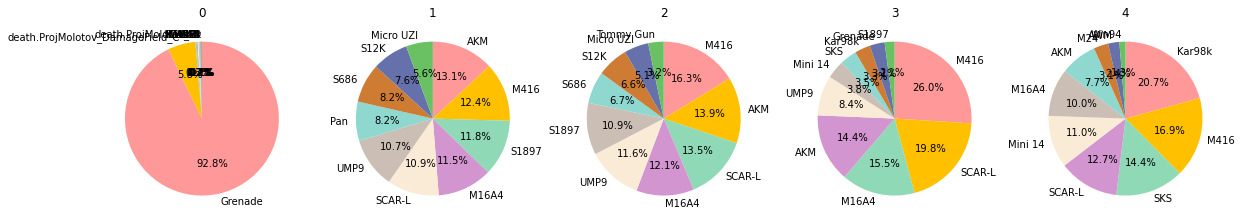

In [47]:
kill_by_type_test(kill_MIRAMAR[kill_MIRAMAR.kill_by_type=='weapon'])

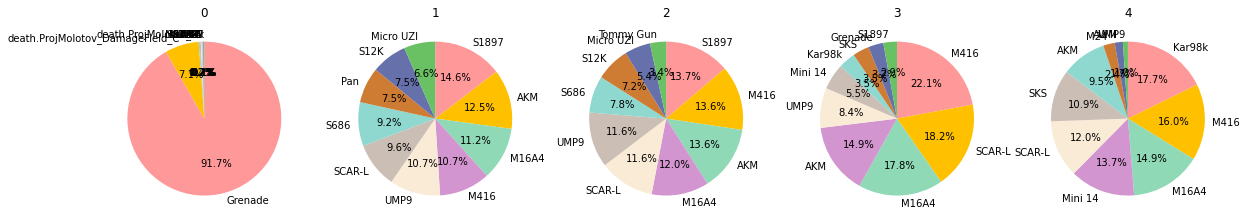

In [48]:
kill_by_type_test(kill_ERANGEL[kill_ERANGEL.kill_by_type=='weapon'])